# How Some Features of Loan Affect on Borrower's APR

### By Pengfei Huangfu

## Investigation Overview

> in this report, i will look into how Borrower APR changes over time and what are the features that can help us determine borrower APR. for that, i think features such as prosper score, stated monthly income and borrower employment status should have a strong effect on borrower APR.

## Dataset Overview

>the dataset contains 113,937 loans with 81 variables. There are so many variables in this dataset. it is hard to find the main features of interest by just looking at the dataset. After some analysis I found that some features are more interesting than others. Through out the project I will work with Borrower APR, Prosper Score, Credit Score, Original Loan Amount, Borrower Occupation, Borrower State, Borrower Employment Status and some other feature if it seems interest later on. in my preliminary analysis, i selected columns that i was interested in to make futher investigation.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# load in the dataset into a pandas dataframe, print statistics
loan=pd.read_csv('prosperLoanData.csv')

# high-level overview of data shape and composition
print(loan.shape)
print(loan.dtypes)
print(loan.head(10))

#Take only the interesting columns
loan = loan.loc[:,('Term','LoanStatus',
                          'BorrowerAPR',
                          'LenderYield',
                          'ProsperScore',
                          'BorrowerState',
                          'Occupation',
                          'EmploymentStatus',
                          'IncomeRange',
                          'StatedMonthlyIncome',
                          'LoanOriginalAmount',
                          'MonthlyLoanPayment') ]

# data wrangling & remove loans with missing borrower APR information
loan['BorrowerAPR'].isna().sum()
loan['BorrowerAPR'].dropna()

# see number of dulipcated data entries
sum(loan.duplicated())

# descriptive statistics for numberic variables
print(loan.describe())

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


## Distribution of Borrower APR

one interesting observation is: there is a concentration at 0.35 which means ton of penple borrow at 0.35. he distribution of Borrower APR takes on a right skewed and multimodal shape.

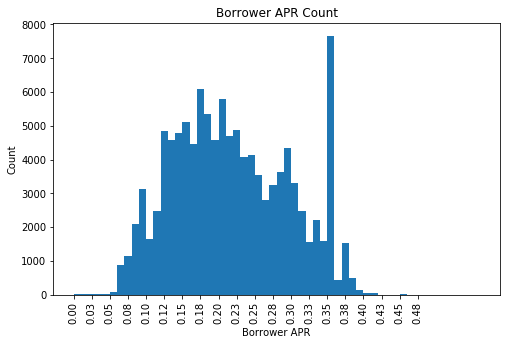

In [3]:
# start with a standard-scaled plot
bins = np.arange(0,loan['BorrowerAPR'].max()+0.05,0.01)

ticks =list(np.arange(0, 0.5, 0.025))

labels = ['{:.2f}'.format(v) for v in ticks]

plt.figure(figsize = [8,5])

plt.xticks(ticks, labels);

plt.xticks(rotation = 90); 

plt.hist(data = loan, x = 'BorrowerAPR',bins = bins);

plt.xlabel('Borrower APR')

plt.ylabel('Count')

plt.title('Borrower APR Count');

## Distribution of Stated Monthly Income

Stated Monthly Income in the dataset take on a very large range of values, from about nearly $0 at the lowest, to about $1,750,002 at the highest. Plotted on a logarithmic scale, the distribution of Stated Monthly Income takes on a normal distribution shape.

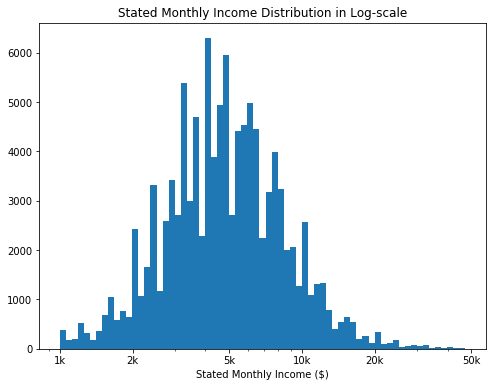

In [4]:
log_binsize = 0.025

bins = 10 ** np.arange(3, 4.7, log_binsize)

plt.figure(figsize=[8, 6])

plt.hist(data = loan, x = 'StatedMonthlyIncome', bins = bins)

plt.xscale('log')

plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k','5k', '10k', '20k', '50k'])

plt.xlabel('Stated Monthly Income ($)')

plt.title('Stated Monthly Income Distribution in Log-scale')

plt.show()

## Prosper Score

the dprosper score is a meansure of borrower's credit rating. the shape is normal distributed and most people has a rank between 4 and 8.

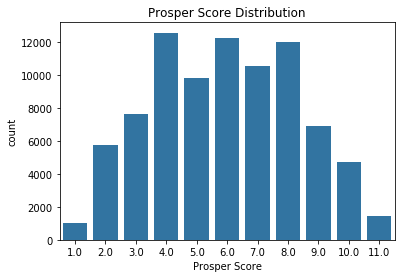

In [5]:
base_color = sns.color_palette()[0]

sns.countplot(data = loan,x= 'ProsperScore',color = base_color)

plt.title('Prosper Score Distribution')

plt.xlabel('Prosper Score');

## Lender Yield

the distribution of lender Yield looks right skewed as well. i thought lender yield could be a very important predictor of borrowers APR.

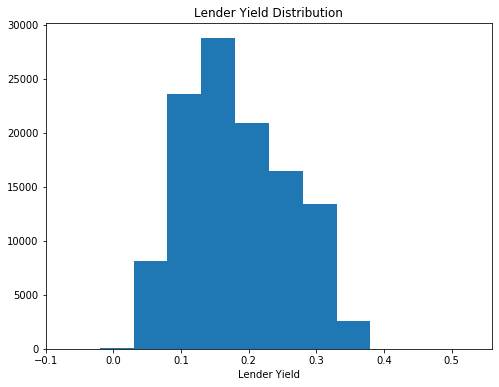

In [6]:
#Lender Yield Distribution
binsize = 0.05

bins = np.arange(-.07, loan['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 6])

plt.hist(data = loan, x = 'LenderYield', bins = bins)

plt.xlabel('Lender Yield')

plt.title('Lender Yield Distribution')

plt.show()

## Prosper Score vs Borrower APR

ProsperScore and BorrowerAPR has a Negative relationship and the coefficient is -0.668, which means a lower score leads to higher risks and hence higher interest rates. a higher prosper score leads to lower borrwoer APR. in reality, it makes sense.

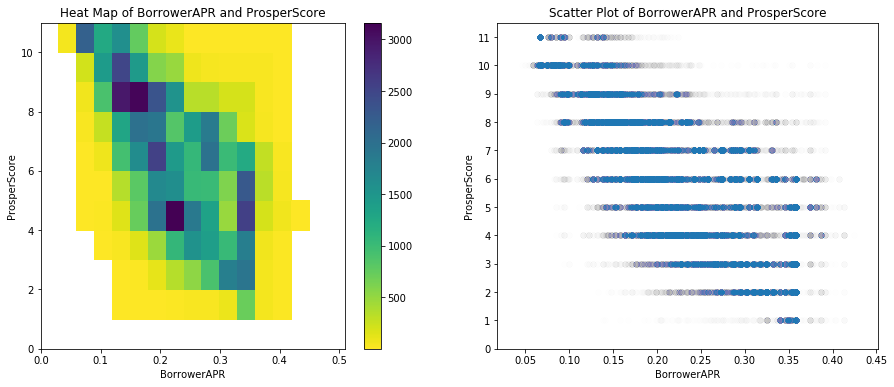

In [7]:
# Checking the relation between ProsperScore and BorrowerAPR
plt.figure(figsize = [15, 6]) 

plt.subplot(1, 2, 1)

bins_x = np.arange(0, loan['BorrowerAPR'].max()+0.02, 0.03)

bins_y = np.arange(0, loan['ProsperScore'].max()+1, 1)

plt.hist2d(data = loan, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)

plt.colorbar()

plt.title('Heat Map of BorrowerAPR and ProsperScore')

plt.xlabel('BorrowerAPR')

plt.ylabel('ProsperScore');


plt.subplot(1, 2, 2)

plt.scatter(data = loan, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)

plt.yticks(np.arange(0, 12, 1))

plt.title('Scatter Plot of BorrowerAPR and ProsperScore')

plt.xlabel('BorrowerAPR')

plt.ylabel('ProsperScore');

## Lend Yield vs Borrower APR

LenderYield and BorrowerAPR have a coefficient correlation of 0.989, which tells us that lender yield is a very strong predictor of Borrower APR. it confirms my assumption before, and in reality, it makes sense.

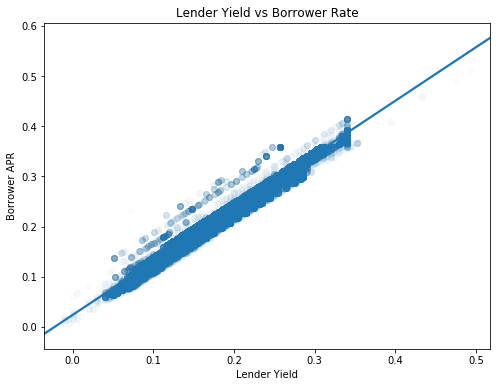

In [8]:
plt.figure(figsize=(8,6))

sns.regplot(data = loan, x = 'LenderYield', y = 'BorrowerAPR', 
            x_jitter= 0.0001, scatter_kws={'alpha':1/50});


plt.xlabel('Lender Yield')

plt.ylabel('Borrower APR')

plt.title('Lender Yield vs Borrower Rate');

## Prosper Score vs. Borrower APR

Borrower APR is negatively correlated to Prosper Score. higher score leads to lower APR.

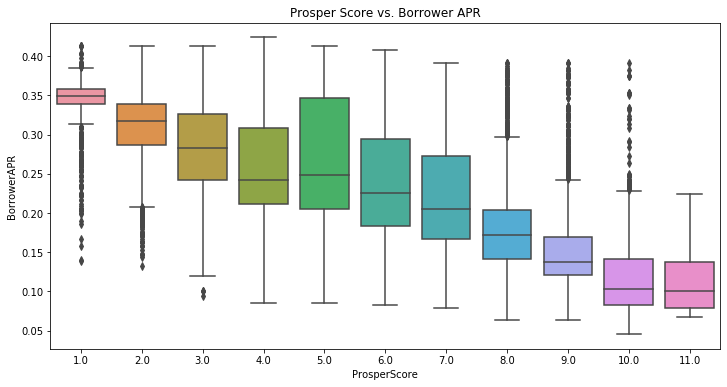

In [9]:
plt.figure(figsize = [12, 6])

sns.boxplot(data = loan,x = 'ProsperScore',y = 'BorrowerAPR');

plt.xlabel('ProsperScore');

plt.ylabel('BorrowerAPR');

plt.title('Prosper Score vs. Borrower APR');

## BorrowerAPR vs CreditScoreRangeUpper & CreditScoreRangeUpper

in addition to negative correlation between prosper score and borrower apr, the chart shows most of the loans with higher amounts (>$20,000) are taken by people with higher prosper score (10 and above)

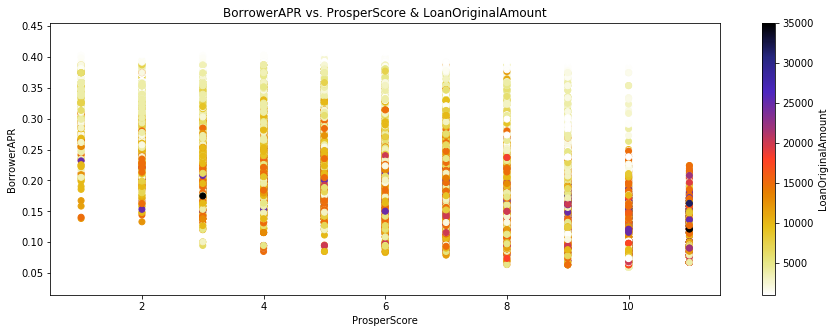

In [10]:
plt.figure(figsize = [15, 5]) 

cm = plt.cm.get_cmap('CMRmap_r')

plt.scatter(data = loan[loan['StatedMonthlyIncome'] <20000],\
            x = 'ProsperScore', y = 'BorrowerAPR', c ='LoanOriginalAmount', cmap=cm) 

plt.colorbar(label = 'LoanOriginalAmount')

plt.title('BorrowerAPR vs. ProsperScore & LoanOriginalAmount')

plt.xlabel('ProsperScore')

plt.ylabel('BorrowerAPR');

## # LenderYield and Borrower APR  vs ProsperRating

this chart confirm the strongly positive correlation between lender yield and borrower APR.
also, people with higher prosper score will tend to get a lower lender yield and borrower APR.

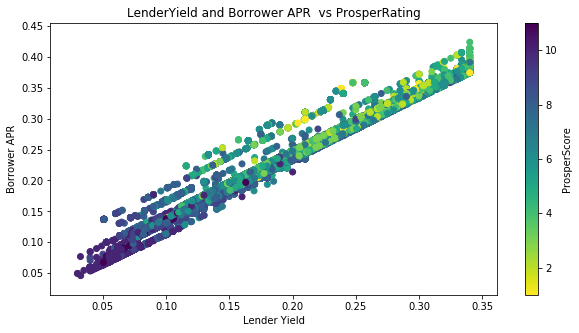

In [11]:
plt.figure(figsize = [10, 5])

plt.scatter(data = loan,x = 'LenderYield',y = 'BorrowerAPR',c = 'ProsperScore',cmap = 'viridis_r')

plt.colorbar(label = 'ProsperScore');

plt.xlabel('Lender Yield')

plt.ylabel('Borrower APR')

plt.title('LenderYield and Borrower APR  vs ProsperRating');